In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout,BatchNormalization
from tensorflow import keras
from tensorflow.keras import regularizers
from sklearn.preprocessing import OneHotEncoder

In [2]:
data1 = pd.read_csv('income.csv')
data1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data1.replace(' ?', np.NaN, inplace=True)

In [4]:
categorical = [var for var in data1.columns if data1[var].dtype=='O']
y = pd.get_dummies(data1.income).iloc[:,1]

In [5]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

# TargetEncoding

In [6]:
te = TargetEncoder(return_df=True)
newData = te.fit_transform(data1[categorical],y)
for i in categorical:
    data1[i] = newData[i]
data1.head()

/home/aidar/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0.271957,77516,0.414753,13,0.045961,0.134483,0.103070,0.25586,0.305737,2174,0,40,0.245835,0.0
1,50,0.284927,83311,0.414753,13,0.446848,0.484014,0.448571,0.25586,0.305737,0,0,13,0.245835,0.0
2,38,0.218673,215646,0.159509,9,0.104209,0.062774,0.103070,0.25586,0.305737,0,0,40,0.245835,0.0
3,53,0.218673,234721,0.051064,7,0.446848,0.062774,0.448571,0.12388,0.305737,0,0,40,0.245835,0.0
4,28,0.218673,338409,0.414753,13,0.446848,0.449034,0.475128,0.12388,0.109461,0,0,40,0.263158,0.0


In [7]:
X = data1.iloc[:,:-1]
y = data1.iloc[:,-1]
# X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size =0.3, shuffle = True)

# LabelEncoding

In [14]:
data = pd.read_csv('income.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
le = LabelEncoder()
for i in categorical[:]:
    data[i] = le.fit_transform(data[i].astype(str))
data.shape

(32561, 15)

# OneHotEncoding

In [118]:
data_One = pd.read_csv('income.csv')

In [119]:
categoricalData = data_One[categorical]
categoricalData.head()


,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [120]:
one_hot_encoder = OneHotEncoder(sparse=False)

y = data_One.iloc[:,-1]

data_One.drop("income", axis='columns', inplace=True)

for i in categorical[:-1]:
    dataToInsert = pd.DataFrame(one_hot_encoder.fit_transform(data_One[i].astype(str).values.reshape(-1,1)),
                                columns = one_hot_encoder.categories_)
    data_One = pd.concat([data_One,dataToInsert],axis =1)
    
data_One.drop(categorical[:-1], axis='columns', inplace=True)

data_One = pd.concat([data_One,y],axis =1)
data_One.head()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,"( ?,)","( Federal-gov,)","( Local-gov,)","( Never-worked,)",...,"( Puerto-Rico,)","( Scotland,)","( South,)","( Taiwan,)","( Thailand,)","( Trinadad&Tobago,)","( United-States,)","( Vietnam,)","( Yugoslavia,)",income
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,<=50K
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,<=50K
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,<=50K
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,<=50K
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,<=50K


In [112]:
def prepareData(data):
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1]
    
    from sklearn.preprocessing import MinMaxScaler

    scaler = MinMaxScaler(feature_range=(0,1))
    scaler.fit(X)
    X= scaler.transform(X)
#     scaler = StandardScaler()
#     X = scaler.fit_transform(X)
#     print(scaler.mean_)

    X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size =0.3, shuffle = True)

    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)
    y_train = pd.get_dummies(y_train)
    y_test = pd.get_dummies(y_test)
#     y_train = np_utils.to_categorical(y_train_l, 2)
#     y_test = np_utils.to_categorical(y_test_l, 2)
    return X_train, X_test, y_train, y_test

In [113]:
 def createModel(X_train,y_train):
    NB_CLASSES = y_train.shape[1]
    INPUT_SHAPE = (X_train.shape[1],)
    model = Sequential()
    model.add(Dense(32, input_shape=INPUT_SHAPE))
    model.add(Activation('relu'))
    model.add(Dense(16))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('relu'))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))
    model.summary()
    return model

In [114]:
def modelLearning(X_train,X_test,y_train,y_test, model,BATCH,EPOCHS = 30):
    
    hist = model.fit(X_train, y_train, batch_size = BATCH, epochs = EPOCHS,
                        verbose = 1, validation_data = (X_test, y_test))
    return hist

In [115]:
def getFScore(history):
    f1_score_list_train = []
    f1_score_list_test = []
    for i in range(30):
        f1_score_list_train.append(2* history.history["precision"][i]*history.history['recall'][i]/
                               (history.history["precision"][i]+history.history['recall'][i]))
        f1_score_list_test.append(2*history.history['val_precision'][i]*history.history['val_recall'][i]/
                              (history.history['val_precision'][i]+history.history['val_recall'][i]))
    return f1_score_list_train, f1_score_list_test

# TargetEncoding

In [14]:
data1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,0.271957,77516,0.414753,13,0.045961,0.134483,0.103070,0.25586,0.305737,2174,0,40,0.245835,0.0
1,50,0.284927,83311,0.414753,13,0.446848,0.484014,0.448571,0.25586,0.305737,0,0,13,0.245835,0.0
2,38,0.218673,215646,0.159509,9,0.104209,0.062774,0.103070,0.25586,0.305737,0,0,40,0.245835,0.0
3,53,0.218673,234721,0.051064,7,0.446848,0.062774,0.448571,0.12388,0.305737,0,0,40,0.245835,0.0
4,28,0.218673,338409,0.414753,13,0.446848,0.449034,0.475128,0.12388,0.109461,0,0,40,0.263158,0.0


In [15]:
X_train_t,X_test_t,y_train_t,y_test_t = prepareData(data1)

In [16]:
model_t = createModel(X_train_t,y_train_t)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                480       
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
activation_2 (Activation)    (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1

In [17]:
model_t.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=["accuracy",'Precision', 'Recall'])

In [18]:
history_t = modelLearning(X_train_t,X_test_t,y_train_t,y_test_t,model_t,128)

Epoch 1/30
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
179/179 [==============================] - 1s 5ms/step - loss: 0.4560 - accuracy: 0.7577 - precision: 0.7576 - recall: 0.7569 - val_loss: 0.3962 - val_accuracy: 0.7565 - val_precision: 0.7565 - val_recall: 0.7565
Epoch 2/30
179/179 [==============================] - 1s 4ms/step - loss: 0.3801 - accuracy: 0.8171 - precision: 0.8171 - recall: 0.8171 - val_loss: 0.3723 - val_accuracy: 0.8357 - val_precision: 0.8357 - val_recall: 0.8357
Epoch 3/30
179/179 [==============================] - 1s 4ms/step - loss: 0.3654 - accuracy: 0.8335 - precision: 0.8335 - recall: 0.8335 - val_loss: 0.3593 - val_accuracy: 0.8394 - val_precision: 0.8394 - val_recall: 0.8394
Epoch 4/30
179/179 [==============================] - 1s 4ms/step - loss: 0.3526 - accuracy: 0.8387 - precision: 0.8387 - recall: 0.8387 - val_loss: 0.3514 - val_accuracy: 0.8415 - val_precision: 0.8415 - val_recall: 0.8415
Epoch 5/30
179/179 [===

KeyboardInterrupt: 

In [ ]:
model_t.evaluate(X_test_t,y_test_t)

#  LabelEncoding

In [131]:
X_train_l,X_test_l,y_train_l,y_test_l = prepareData(data)

In [33]:
model_l = createModel(X_train_l,y_train_l)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                480       
_________________________________________________________________
activation_8 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 136       
_________________________________________________________________
activation_10 (Activation)   (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

In [34]:
model_l.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=["accuracy",'Precision', 'Recall'])

In [35]:
history_l = modelLearning(X_train_l,X_test_l,y_train_l,y_test_l,model_l,128)

Epoch 1/30
179/179 [==============================] - 1s 7ms/step - loss: 0.4802 - accuracy: 0.7751 - precision: 0.7751 - recall: 0.7751 - val_loss: 0.4242 - val_accuracy: 0.8053 - val_precision: 0.8053 - val_recall: 0.8053
Epoch 2/30
179/179 [==============================] - 1s 4ms/step - loss: 0.3905 - accuracy: 0.8226 - precision: 0.8226 - recall: 0.8226 - val_loss: 0.3791 - val_accuracy: 0.8231 - val_precision: 0.8231 - val_recall: 0.8231
Epoch 3/30
179/179 [==============================] - 1s 4ms/step - loss: 0.3605 - accuracy: 0.8335 - precision: 0.8335 - recall: 0.8335 - val_loss: 0.3598 - val_accuracy: 0.8287 - val_precision: 0.8287 - val_recall: 0.8287
Epoch 4/30
179/179 [==============================] - 1s 4ms/step - loss: 0.3458 - accuracy: 0.8411 - precision: 0.8411 - recall: 0.8411 - val_loss: 0.3564 - val_accuracy: 0.8296 - val_precision: 0.8296 - val_recall: 0.8296
Epoch 5/30
179/179 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.8443 - pr

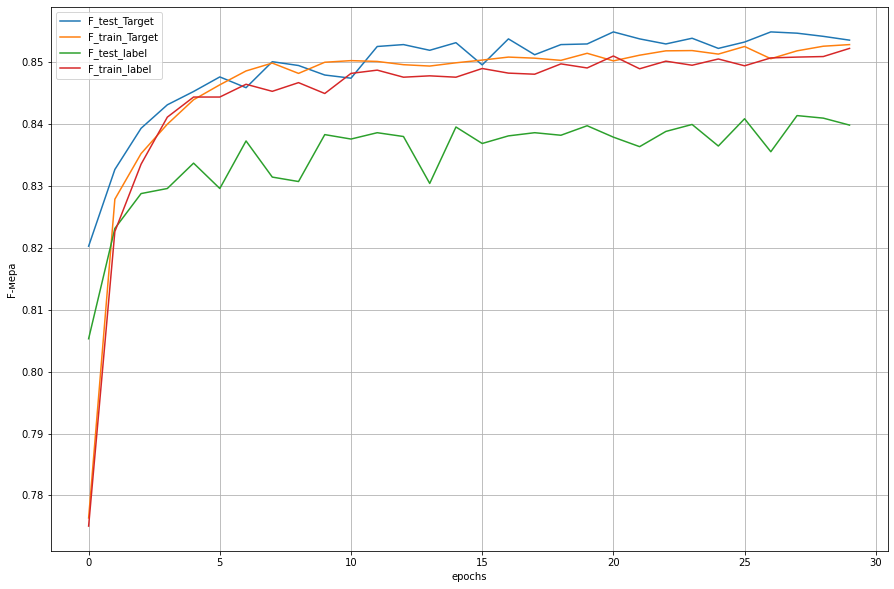

In [36]:
f1_score_train_t, f1_score_test_t = getFScore(history_t)
f1_score_train_l, f1_score_test_l = getFScore(history_l)

epochs = range(30)
plt.figure(figsize = [15,10])
plt.plot(epochs,f1_score_test_t)
plt.plot(epochs,f1_score_train_t)
plt.plot(epochs,f1_score_test_l)
plt.plot(epochs,f1_score_train_l)

plt.grid("on")
plt.xlabel('epochs')
plt.ylabel('F-мера')
plt.legend(["F_test_Target","F_train_Target","F_test_label","F_train_label"])

# Вывод
Из графика видно, что при на тестовой выборке различные виды кодирования категориальных признаков имеет практически одинаковое значение F-меры. Однако на тренировочной выборке значения отличаются в пользу TargetEncoding. Также заметно, что модель нейронной сети показывает лучшее значение, чем алгоритмы на основе деревьев.

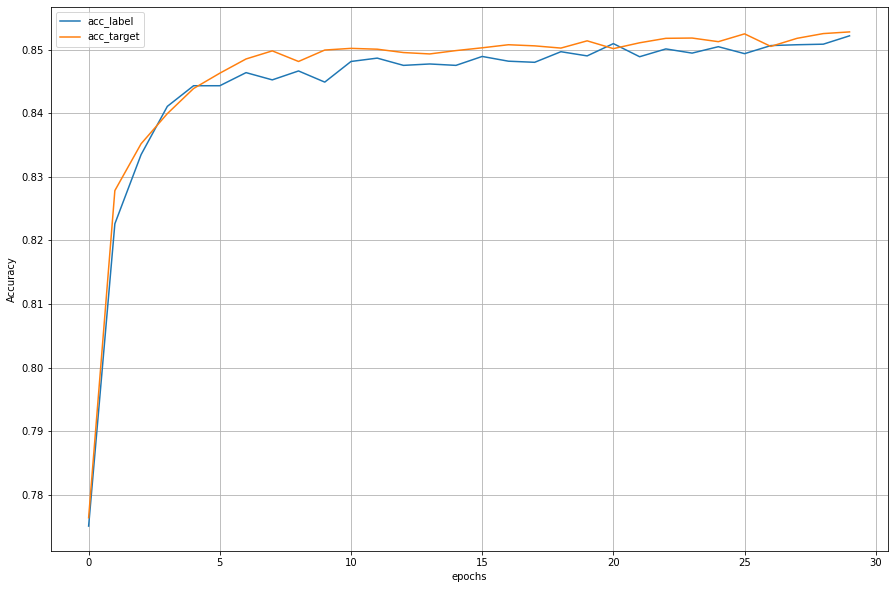

In [38]:
epochs = range(30)
plt.figure(figsize = [15,10])
plt.plot(epochs,history_l.history["accuracy"])
plt.plot(epochs,history_t.history["accuracy"])
plt.grid("on")
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(["acc_label","acc_target"])

# Вывод
Из графика видно, что различные виды кодирования категориальных признаков имеет практически одинаковое значение доли правильных ответов. 

# TargetEncoding

In [39]:
y_pred_t = model_t.predict(X_test_t)
confusion_matrix1 = confusion_matrix(np.argmax(y_test_t.values,axis=-1), np.argmax(y_pred_t,axis = -1)) 
pd.DataFrame(data  =  confusion_matrix1,  columns  =  ['predicted >50', 
'predicted <50'], index = ['actual >50', 'actual <50']) 

,predicted >50,predicted <50
actual >50,7052,353
actual <50,1078,1286


# LabelEncoding

In [40]:
y_pred_l = model_l.predict(X_test_l)
confusion_matrix1 = confusion_matrix(np.argmax(y_test_l.values,axis=-1), np.argmax(y_pred_l,axis = -1)) 
pd.DataFrame(data  =  confusion_matrix1,  columns  =  ['predicted >50', 
'predicted <50'], index = ['actual >50', 'actual <50']) 

,predicted >50,predicted <50
actual >50,6936,427
actual <50,1138,1268


# Новая модель сети

In [216]:
NB_CLASSES = y_train_t.shape[1]
INPUT_SHAPE = (X_train_t.shape[1],)
model = Sequential()
model.add(Dense(128, input_shape=INPUT_SHAPE,
                kernel_initializer='random_uniform',
#                kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)
               ))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64))
model.add(Activation('relu'))
# model.add(Dropout(0.3))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Dropout(0.3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_223 (Dense)            (None, 128)               1920      
_________________________________________________________________
activation_222 (Activation)  (None, 128)               0         
_________________________________________________________________
dropout_117 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_224 (Dense)            (None, 64)                8256      
_________________________________________________________________
activation_223 (Activation)  (None, 64)                0         
_________________________________________________________________
dense_225 (Dense)            (None, 8)                 520       
_________________________________________________________________
activation_224 (Activation)  (None, 8)               

In [217]:
# opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=["accuracy",'Precision', 'Recall'])

In [218]:
history_t_new = modelLearning(X_train_t,X_test_t,y_train_t,y_test_t,model,1024,400)

Epoch 1/400
23/23 [==============================] - 0s 17ms/step - loss: 0.6265 - accuracy: 0.7430 - precision: 0.7412 - recall: 0.6764 - val_loss: 0.5484 - val_accuracy: 0.7565 - val_precision: 0.7565 - val_recall: 0.7565
Epoch 2/400
23/23 [==============================] - 0s 7ms/step - loss: 0.5133 - accuracy: 0.7608 - precision: 0.7619 - recall: 0.6947 - val_loss: 0.4310 - val_accuracy: 0.7565 - val_precision: 0.7565 - val_recall: 0.7565
Epoch 3/400
23/23 [==============================] - 0s 7ms/step - loss: 0.4476 - accuracy: 0.7877 - precision: 0.7891 - recall: 0.7189 - val_loss: 0.3998 - val_accuracy: 0.8301 - val_precision: 0.8301 - val_recall: 0.8301
Epoch 4/400
23/23 [==============================] - 0s 7ms/step - loss: 0.4250 - accuracy: 0.8141 - precision: 0.8179 - recall: 0.7451 - val_loss: 0.3826 - val_accuracy: 0.8296 - val_precision: 0.8296 - val_recall: 0.8296
Epoch 5/400
23/23 [==============================] - 0s 7ms/step - loss: 0.4126 - accuracy: 0.8189 - precis

Epoch 38/400
23/23 [==============================] - 0s 7ms/step - loss: 0.3609 - accuracy: 0.8453 - precision: 0.8523 - recall: 0.7756 - val_loss: 0.3124 - val_accuracy: 0.8557 - val_precision: 0.8557 - val_recall: 0.8557
Epoch 39/400
23/23 [==============================] - 0s 7ms/step - loss: 0.3610 - accuracy: 0.8442 - precision: 0.8523 - recall: 0.7748 - val_loss: 0.3169 - val_accuracy: 0.8537 - val_precision: 0.8537 - val_recall: 0.8537
Epoch 40/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3597 - accuracy: 0.8420 - precision: 0.8501 - recall: 0.7753 - val_loss: 0.3135 - val_accuracy: 0.8551 - val_precision: 0.8551 - val_recall: 0.8551
Epoch 41/400
23/23 [==============================] - 0s 7ms/step - loss: 0.3601 - accuracy: 0.8439 - precision: 0.8527 - recall: 0.7746 - val_loss: 0.3136 - val_accuracy: 0.8558 - val_precision: 0.8558 - val_recall: 0.8558
Epoch 42/400
23/23 [==============================] - 0s 7ms/step - loss: 0.3595 - accuracy: 0.8446 - pr

23/23 [==============================] - 0s 7ms/step - loss: 0.3502 - accuracy: 0.8482 - precision: 0.8574 - recall: 0.7773 - val_loss: 0.3073 - val_accuracy: 0.8567 - val_precision: 0.8567 - val_recall: 0.8567
Epoch 111/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3509 - accuracy: 0.8458 - precision: 0.8552 - recall: 0.7787 - val_loss: 0.3071 - val_accuracy: 0.8581 - val_precision: 0.8581 - val_recall: 0.8581
Epoch 112/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3528 - accuracy: 0.8468 - precision: 0.8563 - recall: 0.7761 - val_loss: 0.3071 - val_accuracy: 0.8574 - val_precision: 0.8574 - val_recall: 0.8574
Epoch 113/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3490 - accuracy: 0.8478 - precision: 0.8564 - recall: 0.7794 - val_loss: 0.3093 - val_accuracy: 0.8569 - val_precision: 0.8569 - val_recall: 0.8569
Epoch 114/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3500 - accuracy: 0.8451 - precision: 

23/23 [==============================] - 0s 7ms/step - loss: 0.3491 - accuracy: 0.8494 - precision: 0.8572 - recall: 0.7792 - val_loss: 0.3048 - val_accuracy: 0.8588 - val_precision: 0.8588 - val_recall: 0.8588
Epoch 183/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3486 - accuracy: 0.8486 - precision: 0.8573 - recall: 0.7780 - val_loss: 0.3068 - val_accuracy: 0.8589 - val_precision: 0.8589 - val_recall: 0.8589
Epoch 184/400
23/23 [==============================] - 0s 7ms/step - loss: 0.3471 - accuracy: 0.8482 - precision: 0.8574 - recall: 0.7797 - val_loss: 0.3070 - val_accuracy: 0.8556 - val_precision: 0.8556 - val_recall: 0.8556
Epoch 185/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3477 - accuracy: 0.8463 - precision: 0.8561 - recall: 0.7787 - val_loss: 0.3074 - val_accuracy: 0.8571 - val_precision: 0.8571 - val_recall: 0.8571
Epoch 186/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3464 - accuracy: 0.8498 - precision: 

23/23 [==============================] - 0s 7ms/step - loss: 0.3435 - accuracy: 0.8506 - precision: 0.8595 - recall: 0.7817 - val_loss: 0.3064 - val_accuracy: 0.8580 - val_precision: 0.8580 - val_recall: 0.8580
Epoch 255/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3420 - accuracy: 0.8499 - precision: 0.8593 - recall: 0.7825 - val_loss: 0.3052 - val_accuracy: 0.8586 - val_precision: 0.8586 - val_recall: 0.8586
Epoch 256/400
23/23 [==============================] - 0s 8ms/step - loss: 0.3426 - accuracy: 0.8503 - precision: 0.8576 - recall: 0.7816 - val_loss: 0.3059 - val_accuracy: 0.8587 - val_precision: 0.8587 - val_recall: 0.8587
Epoch 257/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3410 - accuracy: 0.8500 - precision: 0.8591 - recall: 0.7800 - val_loss: 0.3109 - val_accuracy: 0.8580 - val_precision: 0.8580 - val_recall: 0.8580
Epoch 258/400
23/23 [==============================] - 0s 6ms/step - loss: 0.3454 - accuracy: 0.8499 - precision: 

23/23 [==============================] - 0s 10ms/step - loss: 0.3423 - accuracy: 0.8504 - precision: 0.8587 - recall: 0.7807 - val_loss: 0.3087 - val_accuracy: 0.8537 - val_precision: 0.8537 - val_recall: 0.8537
Epoch 327/400
23/23 [==============================] - 0s 11ms/step - loss: 0.3435 - accuracy: 0.8505 - precision: 0.8582 - recall: 0.7808 - val_loss: 0.3071 - val_accuracy: 0.8575 - val_precision: 0.8575 - val_recall: 0.8575
Epoch 328/400
23/23 [==============================] - 0s 11ms/step - loss: 0.3419 - accuracy: 0.8510 - precision: 0.8589 - recall: 0.7834 - val_loss: 0.3110 - val_accuracy: 0.8524 - val_precision: 0.8524 - val_recall: 0.8524
Epoch 329/400
23/23 [==============================] - 0s 10ms/step - loss: 0.3413 - accuracy: 0.8506 - precision: 0.8594 - recall: 0.7810 - val_loss: 0.3070 - val_accuracy: 0.8589 - val_precision: 0.8589 - val_recall: 0.8589
Epoch 330/400
23/23 [==============================] - 0s 8ms/step - loss: 0.3400 - accuracy: 0.8514 - precisi

23/23 [==============================] - 0s 7ms/step - loss: 0.3377 - accuracy: 0.8519 - precision: 0.8601 - recall: 0.7847 - val_loss: 0.3073 - val_accuracy: 0.8586 - val_precision: 0.8586 - val_recall: 0.8586
Epoch 399/400
23/23 [==============================] - 0s 7ms/step - loss: 0.3380 - accuracy: 0.8509 - precision: 0.8597 - recall: 0.7823 - val_loss: 0.3076 - val_accuracy: 0.8584 - val_precision: 0.8584 - val_recall: 0.8584
Epoch 400/400
23/23 [==============================] - 0s 7ms/step - loss: 0.3400 - accuracy: 0.8526 - precision: 0.8601 - recall: 0.7835 - val_loss: 0.3097 - val_accuracy: 0.8541 - val_precision: 0.8541 - val_recall: 0.8541


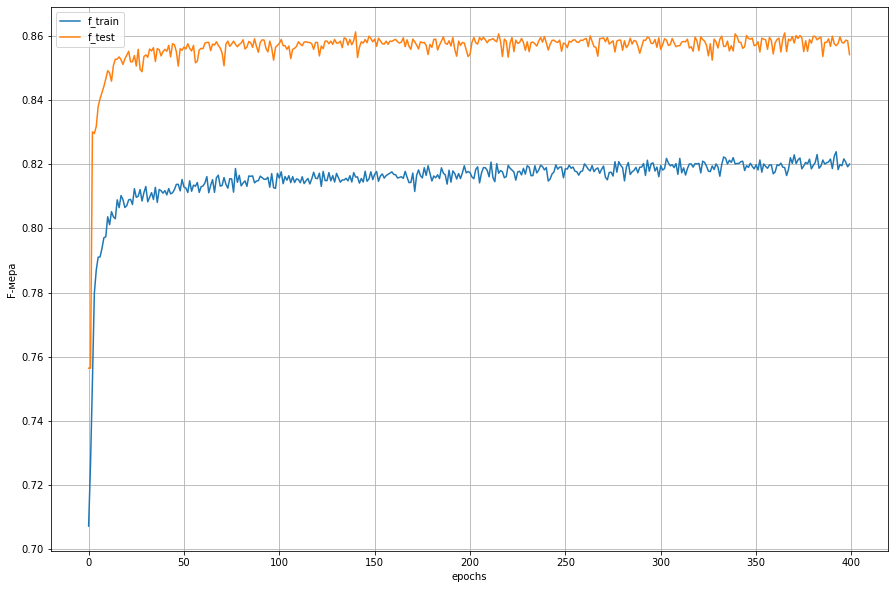

In [219]:
f1_score_list_train = []
f1_score_list_test = []
for i in range(400):
    f1_score_list_train.append(2* history_t_new.history["precision"][i]*history_t_new.history['recall'][i]/
                           (history_t_new.history["precision"][i]+history_t_new.history['recall'][i]))
    f1_score_list_test.append(2*history_t_new.history['val_precision'][i]*history_t_new.history['val_recall'][i]/
                          (history_t_new.history['val_precision'][i]+history_t_new.history['val_recall'][i]))
epochs = range(400)
plt.figure(figsize = [15,10])
plt.plot(epochs,f1_score_list_train)
plt.plot(epochs,f1_score_list_test)
plt.grid("on")
plt.xlabel('epochs')
plt.ylabel('F-мера')
plt.legend(["f_train","f_test"])

# Вывод
Из графика видно, что оптимальным количеством эпох является ~ 150
Также заметно, что значение F-меры также улучшилось по сравнению с первоначальной моделью. В дамнной модели особенностью является увеличение числа скрытых нейронов, а также использование прореживания для регйляризации данных.

#  OneHotEncoding

In [121]:
X_train_O,X_test_O,y_train_O,y_test_O = prepareData(data_One)

In [152]:
NB_CLASSES = y_train_O.shape[1]
INPUT_SHAPE = (X_train_O.shape[1],)
model_O = Sequential()
model_O.add(Dense(32, input_shape=INPUT_SHAPE,
                kernel_initializer='random_uniform',
               kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-3)
               ))
model_O.add(Activation('relu'))
model_O.add(Dropout(0.3))
model_O.add(Dense(16))
model_O.add(Activation('relu'))
model_O.add(Dropout(0.3))
model_O.add(Dense(8))
model_O.add(Activation('relu'))
model_O.add(Dropout(0.3))
model_O.add(Dense(NB_CLASSES))
# model_O.add(Dropout(0.3))
model_O.add(Activation('softmax'))
model_O.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                3488      
_________________________________________________________________
activation_24 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
activation_25 (Activation)   (None, 16)                0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 8)                

In [153]:
model_O.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=["accuracy",'Precision', 'Recall'])

In [154]:
history_O = modelLearning(X_train_O,X_test_O,y_train_O,y_test_O,model_O,128,100)

Epoch 1/100
179/179 [==============================] - 1s 6ms/step - loss: 0.5076 - accuracy: 0.7525 - precision: 0.7526 - recall: 0.7525 - val_loss: 0.3804 - val_accuracy: 0.8335 - val_precision: 0.8335 - val_recall: 0.8335
Epoch 2/100
179/179 [==============================] - 1s 4ms/step - loss: 0.4131 - accuracy: 0.8044 - precision: 0.8044 - recall: 0.8044 - val_loss: 0.3659 - val_accuracy: 0.8302 - val_precision: 0.8302 - val_recall: 0.8302
Epoch 3/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3969 - accuracy: 0.8199 - precision: 0.8199 - recall: 0.8199 - val_loss: 0.3565 - val_accuracy: 0.8387 - val_precision: 0.8387 - val_recall: 0.8387
Epoch 4/100
179/179 [==============================] - 1s 6ms/step - loss: 0.3896 - accuracy: 0.8270 - precision: 0.8270 - recall: 0.8270 - val_loss: 0.3552 - val_accuracy: 0.8419 - val_precision: 0.8419 - val_recall: 0.8419
Epoch 5/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3782 - accuracy: 0.8326

179/179 [==============================] - 1s 5ms/step - loss: 0.3439 - accuracy: 0.8478 - precision: 0.8478 - recall: 0.8478 - val_loss: 0.3316 - val_accuracy: 0.8523 - val_precision: 0.8523 - val_recall: 0.8523
Epoch 38/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3414 - accuracy: 0.8479 - precision: 0.8479 - recall: 0.8479 - val_loss: 0.3320 - val_accuracy: 0.8541 - val_precision: 0.8541 - val_recall: 0.8541
Epoch 39/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3357 - accuracy: 0.8508 - precision: 0.8508 - recall: 0.8508 - val_loss: 0.3347 - val_accuracy: 0.8512 - val_precision: 0.8512 - val_recall: 0.8512
Epoch 40/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8483 - precision: 0.8483 - recall: 0.8483 - val_loss: 0.3355 - val_accuracy: 0.8526 - val_precision: 0.8526 - val_recall: 0.8526
Epoch 41/100
179/179 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8481 - preci

179/179 [==============================] - 1s 5ms/step - loss: 0.3385 - accuracy: 0.8486 - precision: 0.8486 - recall: 0.8486 - val_loss: 0.3351 - val_accuracy: 0.8536 - val_precision: 0.8536 - val_recall: 0.8536
Epoch 74/100
179/179 [==============================] - 1s 5ms/step - loss: 0.3362 - accuracy: 0.8526 - precision: 0.8526 - recall: 0.8526 - val_loss: 0.3342 - val_accuracy: 0.8528 - val_precision: 0.8528 - val_recall: 0.8528
Epoch 75/100
179/179 [==============================] - 1s 5ms/step - loss: 0.3357 - accuracy: 0.8498 - precision: 0.8498 - recall: 0.8498 - val_loss: 0.3346 - val_accuracy: 0.8497 - val_precision: 0.8497 - val_recall: 0.8497
Epoch 76/100
179/179 [==============================] - 1s 4ms/step - loss: 0.3369 - accuracy: 0.8506 - precision: 0.8506 - recall: 0.8506 - val_loss: 0.3336 - val_accuracy: 0.8526 - val_precision: 0.8526 - val_recall: 0.8526
Epoch 77/100
179/179 [==============================] - 1s 5ms/step - loss: 0.3377 - accuracy: 0.8495 - preci

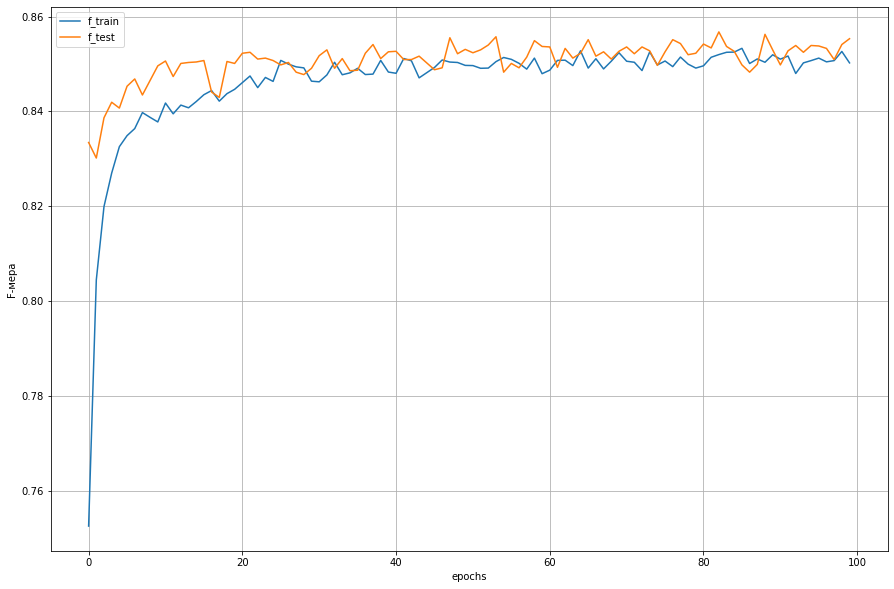

In [155]:
f1_score_list_train = []
f1_score_list_test = []
for i in range(100):
    f1_score_list_train.append(2* history_O.history["precision"][i]*history_O.history['recall'][i]/
                           (history_O.history["precision"][i]+history_O.history['recall'][i]))
    f1_score_list_test.append(2*history_O.history['val_precision'][i]*history_O.history['val_recall'][i]/
                          (history_O.history['val_precision'][i]+history_O.history['val_recall'][i]))
epochs = range(100)
plt.figure(figsize = [15,10])
plt.plot(epochs,f1_score_list_train)
plt.plot(epochs,f1_score_list_test)
plt.grid("on")
plt.xlabel('epochs')
plt.ylabel('F-мера')
plt.legend(["f_train","f_test"])

# Вывод
OneHotEncoding не дает особого преимущества относительно лругих вариантов кодирования. Кроме этого, в данной модели сети использовалась l1 и l2 регуляризация, что показывает, что алгоритм не переобучается на большом количестве эпох